In [12]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp
import pandas as pd

In [15]:
def automateCall(NMAX=1000, samples=5, valgrind=False, op=1):
  NA = np.linspace(1,1000,samples, dtype=int)

  outputs = []
  for i in NA:
    fo = open('tempTest.in', 'w', buffering=1)
    fcontent = ""
    A = set()
    B = set()
    for j in range(i):
      A.add(np.random.randint(1,NMAX))
      B.add(np.random.randint(1,NMAX))
    
    A = set(A)
    B = set(B)
    
    na = len(A)
    nb = len(B)

    fcontent += f"{na}\n"
    fcontent += f"{nb}\n"
    
    for k in A:
      fcontent += f"{k} "

    fcontent += '\n'

    for k in B:
      fcontent += f"{k} "

    fcontent += '\n'
    # op = np.random.randint(1,5)
    fcontent += (f"{op}\n")
    if op in [1,4]: 
      fcontent += f"{np.random.randint(1,NMAX)}"
      fcontent += "\n"
    
    fo.write(fcontent)

    tempf = 'tempTest.in'
    cmdl = f"./../Src/exec < {tempf}"
    if valgrind:
      cmdl = f"valgrind ./../Src/exec < {tempf}"
    

    if valgrind: 
      a = sp.call(cmdl, shell=True)
      print(a)
    else:
      a = sp.check_output(cmdl, shell=True)
      r = a.decode('utf-8')
      r = r.strip('\n').split(',')
      outputs.append(r)
    # print(a)
  return outputs

In [47]:
outs1 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=1)
outs2 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=2)
outs3 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=3)
outs4 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=4)
outs5 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=5)

In [112]:
outs0 = automateCall(NMAX=5000, samples=1000, valgrind=False, op=0)

In [126]:
df0 = pd.DataFrame(outs0)
columns = ['na', 'nb', 'op', 'time']
df0.columns = columns
df0 = df0.astype({'na':int, 'nb':int, 'op':int, 'time':float})


In [48]:
df1 = pd.DataFrame(outs1)
columns = ['na', 'nb', 'op', 'time']
df1.columns = columns
df1 = df1.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df2 = pd.DataFrame(outs2)
df2.columns = columns
df2 = df2.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df3 = pd.DataFrame(outs3)
df3.columns = columns
df3 = df3.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df4 = pd.DataFrame(outs4)
df4.columns = columns
df4 = df4.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df5 = pd.DataFrame(outs5)
df5.columns = columns
df5 = df5.astype({'na':int, 'nb':int, 'op':int, 'time':float})


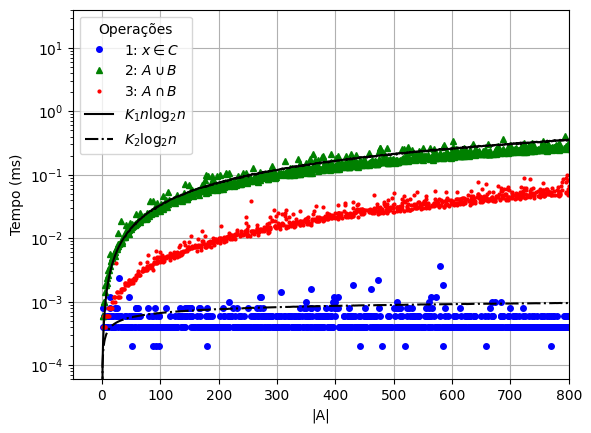

In [97]:
scaleFc = 200
plt.plot(df1['na'], df1['time'] * scaleFc, 'bo', ms=4, label=r'1: $x \in C$')
plt.plot(df2['na'], df2['time'] * scaleFc, 'g^', ms=4, label=r'2: $A \cup B$')
plt.plot(df3['na'], df3['time'] * scaleFc, 'r.', ms=4, label=r'3: $A \cap B$')
plt.plot([i*np.log2(i)/20000 for i in df1['nb']], 'k-', label=r'$K_1 n \log _2 n$')
plt.plot([np.log2(i)/10000 for i in df1['nb']], 'k-.', label=r'$K_2 \log _2 n$')
plt.yscale('log')
plt.legend(title='Operações')
plt.xlim(-50,800)
plt.ylim(0.00006,40)
plt.xlabel('|A|')
plt.ylabel('Tempo (ms)')
plt.grid()
plt.savefig('setOps1.png')
plt.show()

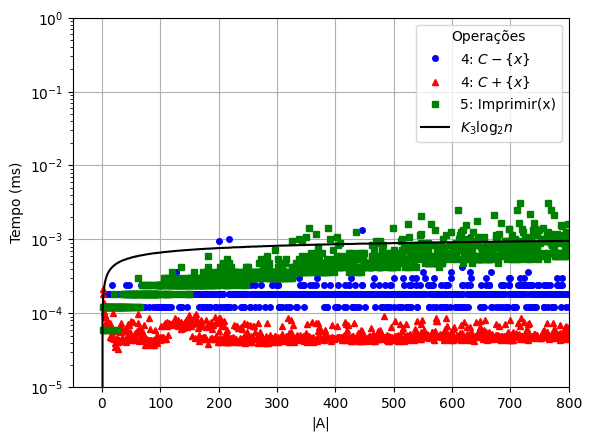

In [119]:
scaleFc = 60
plt.plot(df4['na'], df4['time'] * scaleFc, 'bo', ms=4, label=r'4: $C - \{x\}$')
plt.plot(df0['na'], (df0['time'] * scaleFc)/df0['na'], 'r^', ms=4, label=r'4: $C + \{x\}$')
plt.plot(df5['na'], df5['time'] * scaleFc, 'gs', ms=4, label=r'5: Imprimir(x)')
plt.plot([np.log2(i)/10000 for i in df1['nb']], 'k-', label=r'$K_3 \log _2 n$')
plt.yscale('log')
plt.legend(title='Operações')
plt.xlim(-50,800)
plt.ylim(0.00001,1)
plt.xlabel('|A|')
plt.ylabel('Tempo (ms)')
plt.grid()
plt.savefig('setOps2.png')
plt.show()

In [125]:
outs = automateCall(NMAX=1000, samples=5, valgrind=True, op=4)

==68613== Memcheck, a memory error detector
==68613== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==68613== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==68613== Command: ./../Src/exec
==68613== 
==68613== 
==68613== HEAP SUMMARY:
==68613==     in use at exit: 0 bytes in 0 blocks
==68613==   total heap usage: 10 allocs, 10 frees, 4,220 bytes allocated
==68613== 
==68613== All heap blocks were freed -- no leaks are possible
==68613== 
==68613== For lists of detected and suppressed errors, rerun with: -s
==68613== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==68615== Memcheck, a memory error detector
==68615== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==68615== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==68615== Command: ./../Src/exec
==68615== 


0


==68615== 
==68615== HEAP SUMMARY:
==68615==     in use at exit: 0 bytes in 0 blocks
==68615==   total heap usage: 884 allocs, 884 frees, 19,952 bytes allocated
==68615== 
==68615== All heap blocks were freed -- no leaks are possible
==68615== 
==68615== For lists of detected and suppressed errors, rerun with: -s
==68615== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==68618== Memcheck, a memory error detector
==68618== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==68618== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==68618== Command: ./../Src/exec
==68618== 


0


==68618== 
==68618== HEAP SUMMARY:
==68618==     in use at exit: 0 bytes in 0 blocks
==68618==   total heap usage: 1,582 allocs, 1,582 frees, 32,516 bytes allocated
==68618== 
==68618== All heap blocks were freed -- no leaks are possible
==68618== 
==68618== For lists of detected and suppressed errors, rerun with: -s
==68618== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==68620== Memcheck, a memory error detector
==68620== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==68620== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==68620== Command: ./../Src/exec
==68620== 


0


==68620== 
==68620== HEAP SUMMARY:
==68620==     in use at exit: 0 bytes in 0 blocks
==68620==   total heap usage: 2,106 allocs, 2,106 frees, 41,948 bytes allocated
==68620== 
==68620== All heap blocks were freed -- no leaks are possible
==68620== 
==68620== For lists of detected and suppressed errors, rerun with: -s
==68620== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==68622== Memcheck, a memory error detector
==68622== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==68622== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==68622== Command: ./../Src/exec
==68622== 


0
0


==68622== 
==68622== HEAP SUMMARY:
==68622==     in use at exit: 0 bytes in 0 blocks
==68622==   total heap usage: 2,510 allocs, 2,510 frees, 49,220 bytes allocated
==68622== 
==68622== All heap blocks were freed -- no leaks are possible
==68622== 
==68622== For lists of detected and suppressed errors, rerun with: -s
==68622== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)


In [10]:
outs = automateCall(NMAX=1000, samples=5, valgrind=False)

In [11]:
outs

[['1', '1', '1', '0.000006'],
 ['221', '231', '1', '0.000550'],
 ['387', '405', '1', '0.000879'],
 ['514', '522', '1', '0.000006'],
 ['641', '642', '1', '0.000003']]